## The Likelihood Ratio Test 
An intuitive explanation of the likelihood-ratio test through a worked example in R

The likelihood ratio test (LRT) is a statistical test used to compare the goodness of fit of two models based on the ratio of their likelihoods. This article will use the LRT to compare two models which aim to predict a sequence of coin flips in order to develop an intuitive understanding of the LRT and why it works. Let's review the concept of Likelihood and how we can find the value of a parameter, in this casse the probability of flipping a heads, that makes our data the most likely. We will then show how adding independent parameters expands our parameter space and how under certain circumstances a simpler model may constitute a subspace of a more complex model. Finally, we will discuss how to use Wilk's Theorem to assess whether a more complex model fits data significantly better than a simpler model.  

### Flipping Coins 

Let's start by randomly flipping a quarter with an unknown probability @ of landing a heads:

P(heads) = @

Let's flip the quarter ten times:

In [1]:
set.seed(4)
s_quarter <- sample(c(0,1), 10, replace=TRUE, prob= c(.2, .7))
s_quarter

[1] 1 1 1 1 0 1 1 0 0 1

We flip it ten times and get 7 heads (represented as 1) and 3 tails (represented as 0). We want to know what parameter @ makes our data, the sequence above , most likely. To find the value of @, the probability of flipping a heads, we can calculate the likelihood of observing this data given a particular value of @. Put mathematically, we express the likelihood of observing our data d given @ as : L(d|@). We want to find the value of @ which maximizes L(d|@).

Intuitively, you might guess that since we have 7 heads and 3 tails our best guess for @ is 7/10 = 0.7.

Let's write a function to check that intuition by calculating how likely it is we see a particular sequence of heads and tails for some possible values in the parameter space @. Since each coin flip is independent, the probability of observing a particular sequence of coin flips is the product of the probability of observing each individual coin flip. In the functions below we start with a likelihood of 1 and each time we encounter a heads we multiply our likelihood by the probability of landing a heads. Each time we encounter a tail we multiply by the 1 minus the probability of flipping a heads.


In [2]:
# function to calculate the likelihood of observing a particular sequence of heads and tails (d) given a probability of flipping heads(p).

likelihood <- function(d, p) {
    l <- 1
    for (i in d) {
        if (i == 1) {
            l <- l*p
        }
        else {
            l <- l * (1-p)
        }
    }
    return(l)
    }

Now that we have a function to calculate the likelihood of observing a sequence of coin flips given a @, the probability of heads, let's graph the likelihood for a couple of different values of @. 

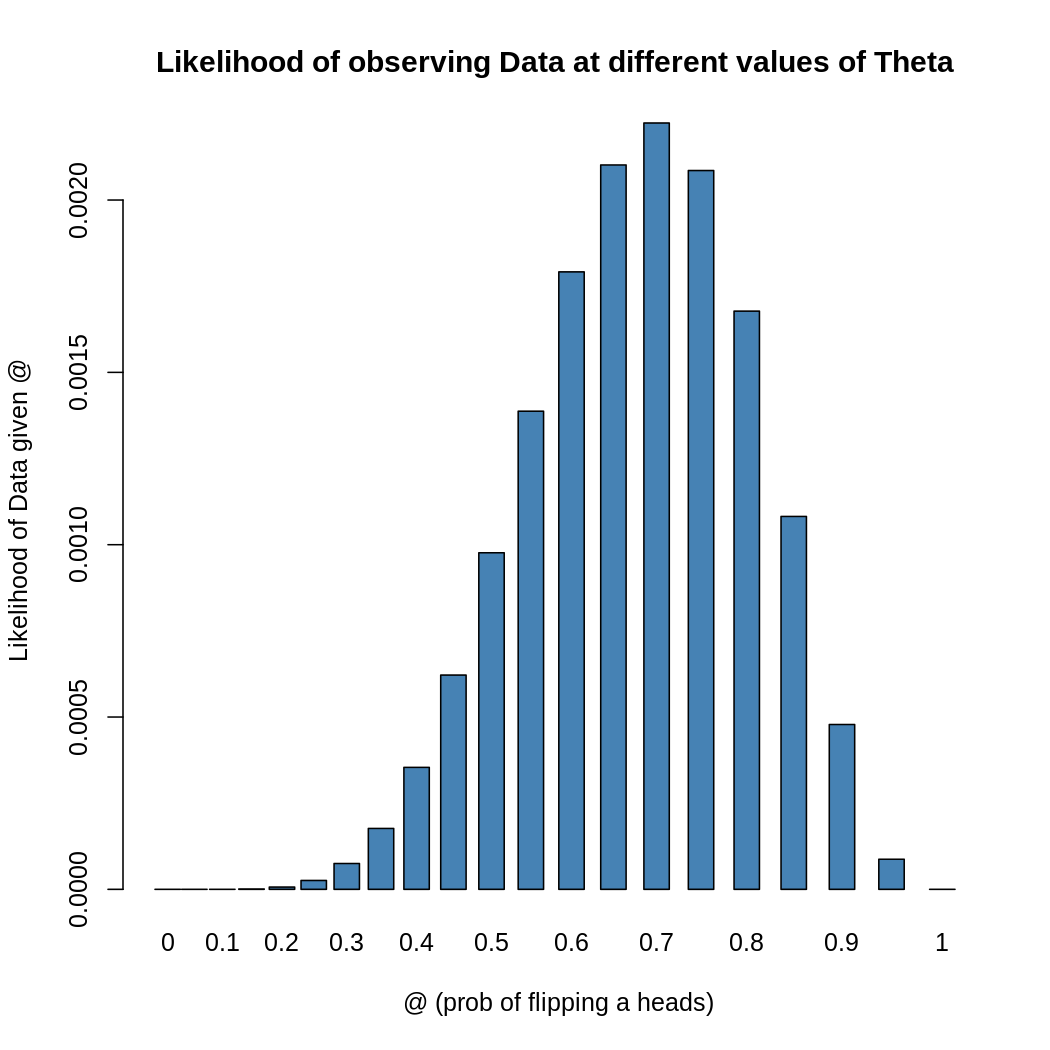

In [3]:
## Creates a vector of potential values for theta, the probability of flipping a heads
potential_thetas <- seq(0, 1, by=.05)

options(repr.plot.res = 150)

barplot(likelihood(s_quarter, potential_thetas), potential_thetas, names= potential_thetas, width=.9, col="steelblue",
        main="Likelihood of observing Data at different values of Theta", 
        xlab=" @ (prob of flipping a heads)", ylab = "Likelihood of Data given @")

In this graph, we can see that we maximize the likelihood of observing our data when @ equals 7. We have confirmed that our intuition we are most likely to see that sequence of data when the value of @ = 0.7 .

Now let's do the same experiment flipping a new coin, a penny for example, again with an unknown probability of landing on heads. We can combine the flips we did with the quarter and those we did with the penny to make a single sequence of 20 flips.  

In [4]:
set.seed(7)
s_penny <- sample(c(0,1), 10, replace=TRUE, prob= c(.8, .2))
quarter_then_penny <- c(append(s_quarter, s_penny))
cat("quarter flips:", quarter_then_penny[1:10], "\n \n")
cat("penny flips:", quarter_then_penny[11:20], "\n \n")
cat("all flips:", quarter_then_penny, "\n \n")

quarter flips: 1 1 1 1 0 1 1 0 0 1 
 
penny flips: 1 0 0 0 0 0 0 1 0 0 
 
all flips: 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 
 


If we did not know that the coins were different and we followed our procedure we might update our guess and say that since we have 9 heads out of 20 our maximum likelihood would occur when we let the probability of heads be .45. We graph that below to confirm our intuition.

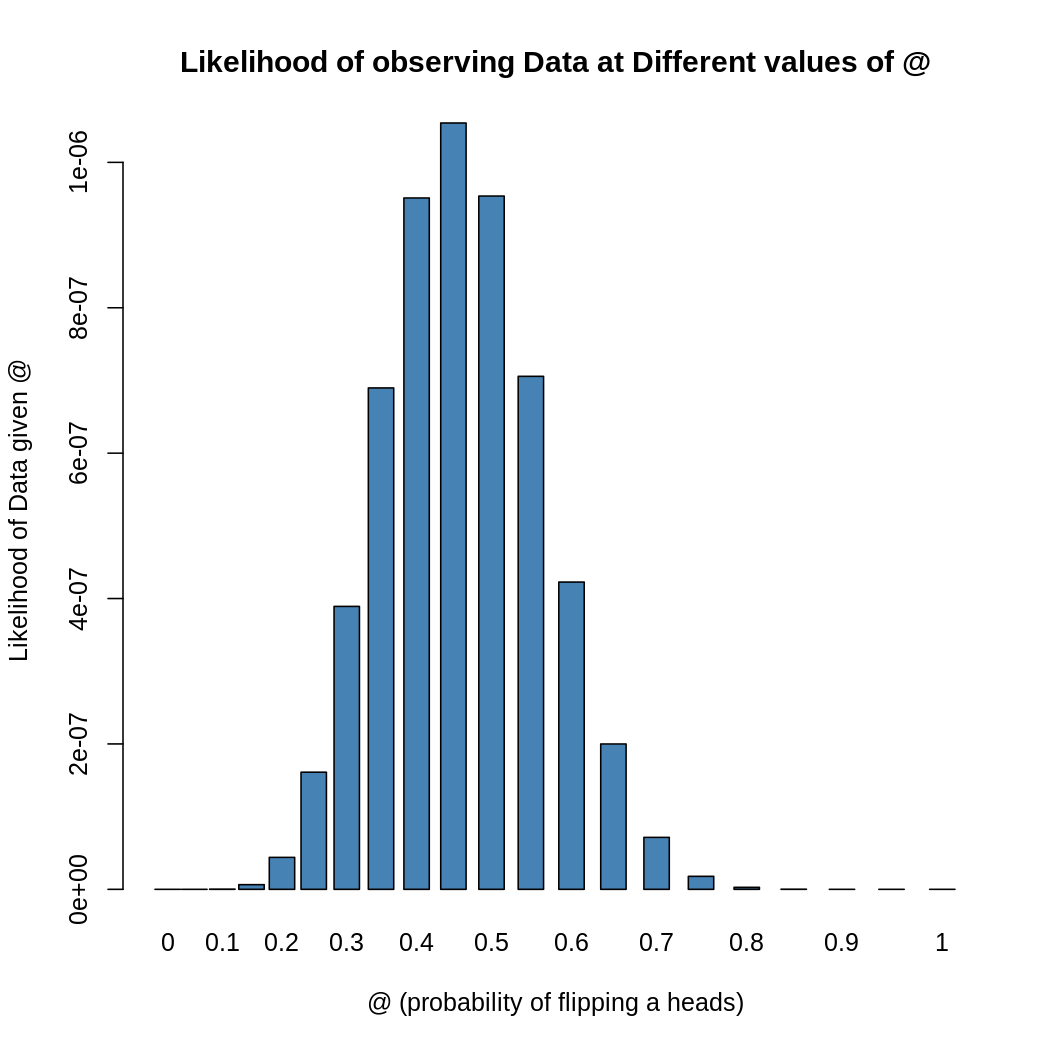

In [5]:
barplot(likelihood(quarter_then_penny, potential_thetas), potential_thetas, names= potential_thetas, width=.9, col="steelblue",
        main="Likelihood of observing Data at Different values of @",
        xlab="@ (probability of flipping a heads)", ylab = "Likelihood of Data given @")

In the above scenario we have modeled the flipping of two coins using a single @. Maybe we can improve our model by adding an additional parameter. What if we know that there are two coins and we know when we are flipping each of them? We can try to model this sequence of flips using two parameters, one for each coin. Adding a parameter also means adding a dimension to our parameter space. Let's visualize our new parameter space:

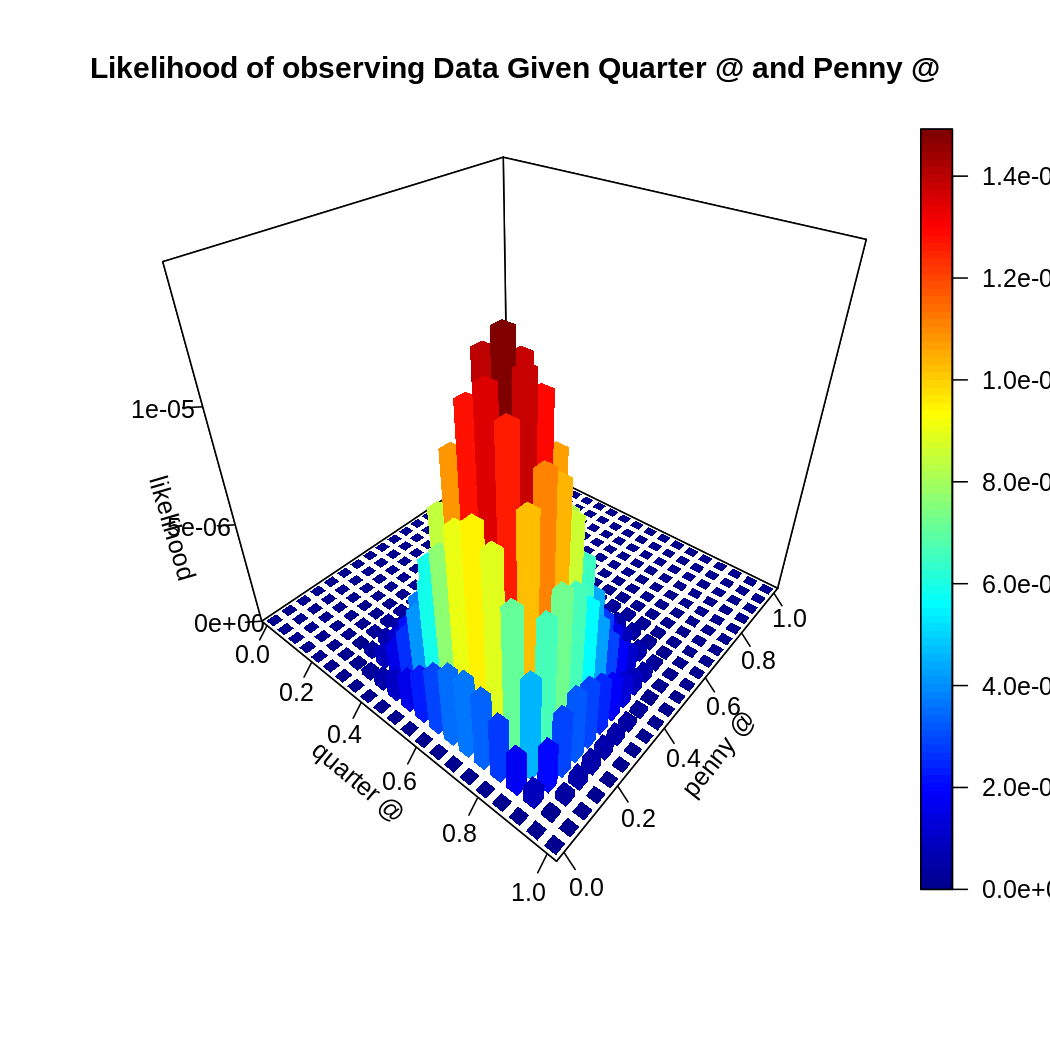

In [6]:
two_coin_matrix <- (likelihood(s_quarter, potential_thetas)) %o% (likelihood(s_penny, potential_thetas))
# Finds coordinates of maximum value in matrix
xy <- as.vector(which(two_coin_matrix==max(two_coin_matrix), arr.ind=T))

# please note hist3D is part of the plot3D package https://www.rdocumentation.org/packages/plot3D/versions/1.4/topics/3-D%20perspectives

library(plot3D)

hist3D(x=(potential_thetas), y=potential_thetas, z=two_coin_matrix, ticktype="detailed", space=0.35, phi= 35, color= rainbow, 
       xlab="quarter @", ylab = "penny @", zlab = "likelihood", 
       main = "Likelihood of observing Data Given Quarter @ and Penny @")

The graph above shows the likelihood of observing our data given the different values of each of our two parameters. Observe that using one parameter is equivalent to saying that quarter_@ and penny_@ are the same. In the graph above, quarter_@ and penny_@ are the same along the diagonal so we can say that the one parameter model constitutes a subspace of our two parameter model. In this case the subspace occurs along the diagonal. If we slice the above graph down the diagonal we will recreate our original 2D graph.

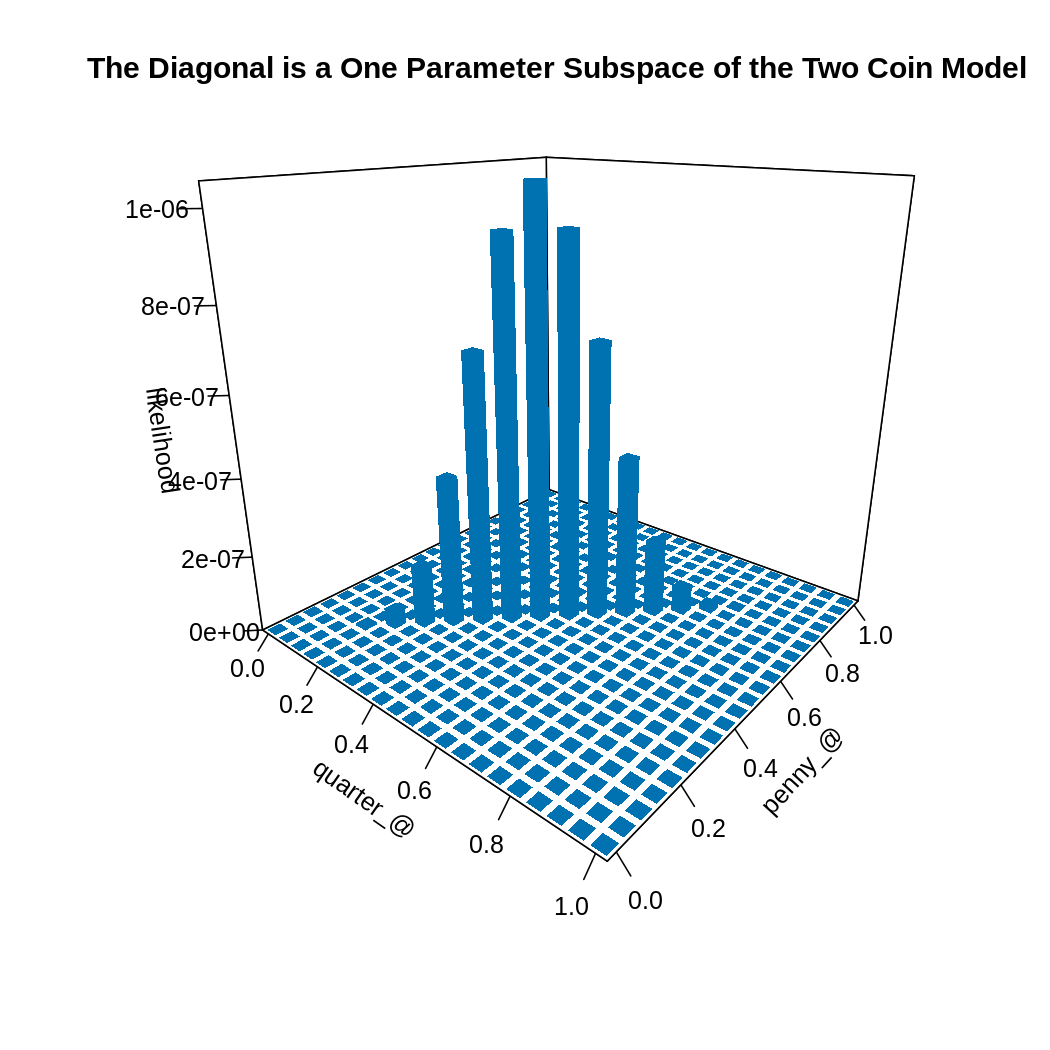

In [7]:
diagonal <- diag(diag(two_coin_matrix))
hist3D(x = (potential_thetas), y = potential_thetas, z = diagonal, ticktype = "detailed", space = 0.3, phi = 20, col = "#0072B2",
       xlab = "quarter_@", ylab = "penny_@", zlab="likelihood",
      main = "The Diagonal is a One Parameter Subspace of the Two Coin Model")

The above graph is the same as the graph we generated when we assumed that the quarter and the penny had the same probability of landing heads. Know we can think of ourselves as comparing two models where the base model (flipping one coin) is a subspace of a more complex full model (flipping two coins).

To visualize how much more likely we are to observe the data when we add a parameter, let's graph the maximum likelihood in the two parameter model on the graph above. 

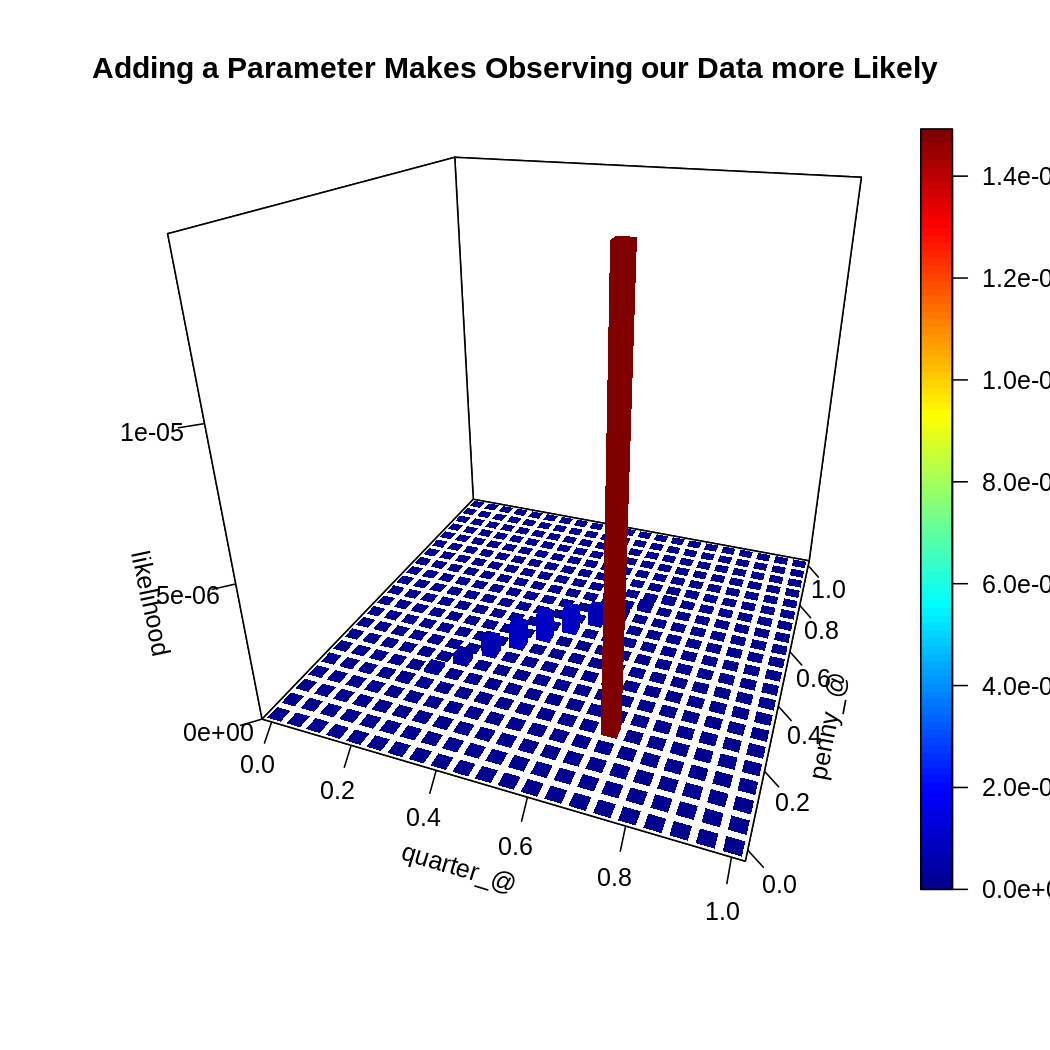

In [20]:
diagonal[15,5] <- two_coin_matrix[15,5]
hist3D(x = (potential_thetas), y=potential_thetas, z=diagonal, ticktype="detailed", space=0.3, phi=25, 
       xlab="quarter_@", ylab="penny_@", zlab="likelihood", theta=20,
       main="Adding a Parameter Makes Observing our Data more Likely")

In this scenario adding a second parameter makes observing our sequence of 20 coin flips much more likely. 

### From Likelihood to the Likelihood-Ratio Test

We can see in the graph above that the likelihood of observing the data is much higher in the two-parameter model than in the one parameter model. However, what if each of the coins we flipped had the same probability of landing heads? Then there might be no advantage to adding a second parameter. So how can we quantifiably determine if adding a parameter makes our model fit the data significantly better? A natural first step is to take the **Likelihood Ratio**: which is defined as the ratio of the Maximum Likelihood of our simple model over the Maximum Likelihood of the complex model ML_simple/ML_complex.

Let's also define a null and alternative hypothesis for our example of flipping a quarter and then a penny:

**Null Hypothesis:** Probability of Heads Quarter = Probability of Heads Penny

**Alternative Hypothesis:** Probability of Heads Quarter != Probability of Heads Penny

In [17]:
ML_null <- max(diagonal)
ML_alternative <- min(two_coin_matrix)
LR <- ML_alternative/ML_null

The likelihood ratio of the ML of the simple model to the ML of the complex model is LR = 14.15558

Based on this number, we might think the complex model is better and we should reject our null hypothesis. But we are still using eyeball intuition. To quantify this further, we need the help of **Wilk's Theorem** which states that -2log(LR)is chi-squared distributed as the sample size (in this case the number of flips) approaches infinity when the null hypothesis is true. By Wilk's theorem, we define the **Likelihood-Ratio Test Statistic** as: λ_LR = -2[log(ML_null) - log(ML_alternative)] .

Why is it true that the Likelihood-Ratio Test Statistic is Chi-squared distributed?
First recall that the chi-square distribution is the sum of the squares of k independent standard normal random variables. Below is the graph of the chi-square distribution at different degrees of freedom (values of k).

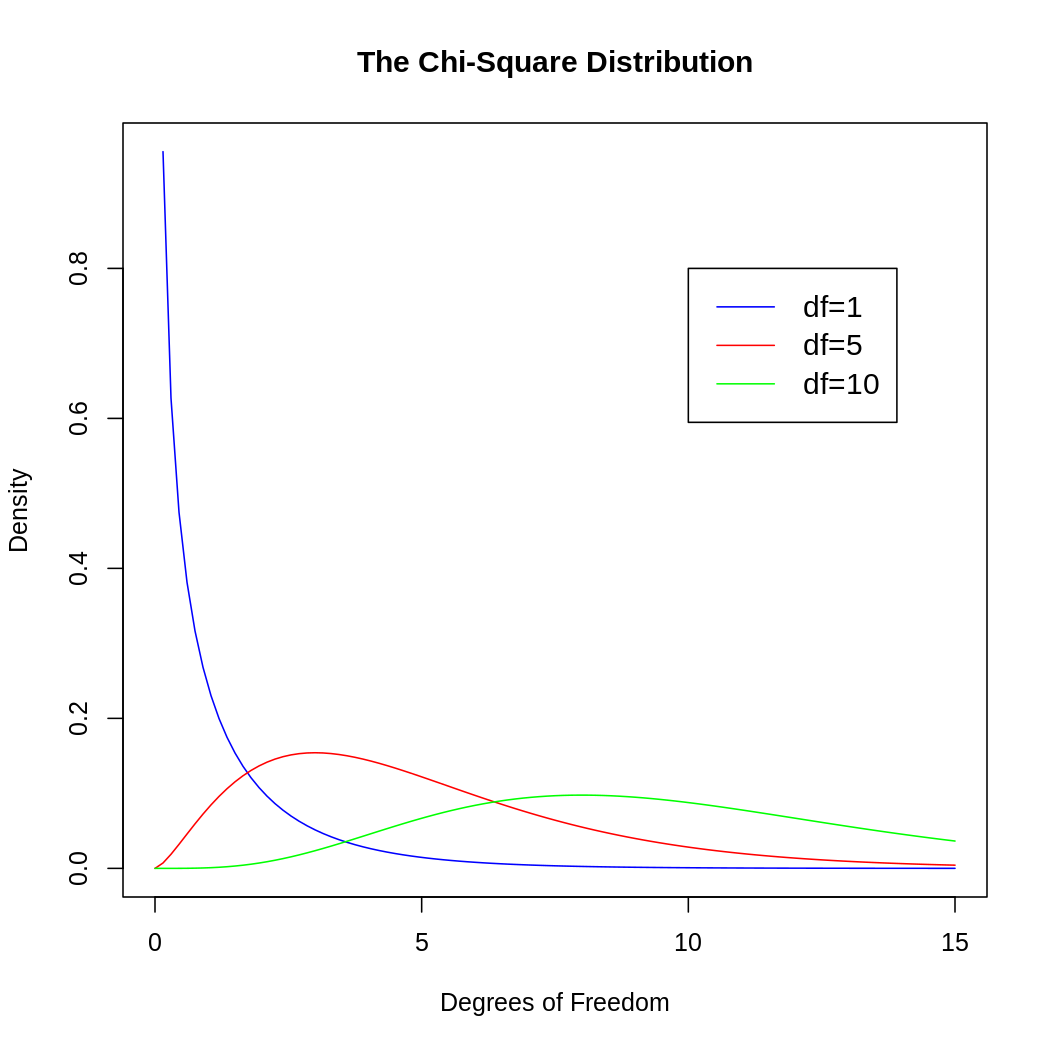

In [23]:
curve(dchisq(x,1), from=0, to=15, col="blue", main="The Chi-Square Distribution", xlab="Degrees of Freedom", ylab="Density")
curve(dchisq(x,5), from=0, to=15, col="red", add=T)
curve(dchisq(x,10), from=0, to=15, col="green", add=T)
legend(10, .8, legend=c("df=1", "df=5", "df=10"), 
       col=c("blue", "red", "green"), lty=1, cex=1.2)

How can we transform our likelihood ratio so that it follows the chi-square distribution? First observe that in the bar graphs above each of the graphs of our parameters is approximately normally distributed so we have normal random variables. We can turn a ratio into a sum by taking the log.

Doing so gives us log(ML_alternative) - log(ML_null).

But we do not want normal RV, we want squared normal variables.

log(ML_alternative^2] - log[ML_null^2]

and by the rule of logarithms, we get:
2 * [log(ML_alternative) - log(ML_null)]

or in the form used by Wilk's :

-2[log(ML_null)-log(ML_alternative)]

Wilk's theorem tells us that the above statistic will asympotically be Chi-Square Distributed.

First let's write a function to flip a coin with probability p of landing heads. Let's also create a variable called flips which simulates flipping this coin 1000 times in 1000 independent experiments to create 1000 sequences of 1000 flips.

In [25]:
flipcoin <- function(p,n){
    f <- sample(c(0,1), n, replace=TRUE, prob=c(1-p,p))
    return (f)
    }

# Flip a coin 1000 times 1000 times 
flips_per_experiment = 1000
n_experiments = 2000
prob_heads = c(.6)
flips <- list()
for (i in 1:n_experiments){
    flips = c(flips, list((flipcoin(prob_heads, flips_per_experiment))))
    }

Now let's write a function which calculates the maximum likelihood for a given number of paramters. This function works dividing the data into even chunks (think of each chunk as representing its own coin) and calculating the maximum likelihood of observing the data in each chunk. For example, if this function is given the sequence of ten flips: 1,1,1,0,0,0,1,0,1,0 and told to use two parameter it will return the vector (.6, .4) corresponding to the maximum likelihood estimate for the first five flips (three head out of five = .6) and the last five flips (2 head out of five=.4). If we pass the same data but tell the model to only use one parameter it will return the vector (.5). 

In [41]:
calc_max_likelihood_params <- function(flips, number_params){
    samples <- split(flips, ceiling(seq_along(flips)/(length(flips)/number_params)))
    p_vals <- c()
    for (i in 1: length(samples)){
        p <- sum(samples[[i]]/length(samples[[i]]))
        p_vals <- c(p_vals, p)
    }
    return (p_vals)
    }

Now we need a function to calculate the likelihood of observing our data given n number of parameters. This function works by dividing the data into even chunks based on the number of parameters and then calculating the likelihood of observing each sequence given the parameter. For example, if we pass the sequence 11.01 and the parameters (.9,.5) to this function it will return a likelihood of .2025 which is found by calculating that the likelihood of observing two heads given a .9 probability of landing heads is .81 and the likelihood of landing 1 tails and 1 heads given a probability of .5 of landing head is .25. Sinece these are independent we multiply each likelihood together to get a final likelihood of observing the data given our two parameters of .2025. 

In [42]:
calc_likelihood <- function(flips, params){
    samples <- split(flips, ceiling(seq_along(flips)/(length(flips)/length(params))))
    likelihoods <- c()
    for (i in 1: length(samples)){
        l <- likelihood(samples[[i]], params[i])
        likelihoods <- c(likelihoods, l)
        }
    return (prod(likelihoods))
}

In [43]:
# Now we write a function to find the lielihood ratio:
calc_LR <- function(d, ps1, ps2){
    l1 <- calc_likelihood(d, ps1)
    l2 <- calc_likelihood(d, ps2)
    lr <- l1/l2
    lrt <- -2*(log(lr))
    return (lrt)
}

And then finally we can put it all together by writing a function which returns the Likelihood-Ratio Test Statistic based on a set of data and the number of parameters in two different models. 

In [44]:
calc_LRTS <- function(flips, num_params_model_1, num_params_model_2) {
    LRTs <- c()
    for (j in 1: length(flips)){
        f <- flips[[j]]
        max_probs_model_1 <- calc_max_likelihood_params(f, num_params_model_1)
        max_probs_model_2 <- calc_max_likelihood_params(f, num_params_model_2)
        statistic <- calc_LR(f, max_probs_model_1, max_probs_model_2)
        LRTs <- append(LRTs, statistic)
    }
    return(LRTs)
}

Now we are ready to show that the Likelihood-Ratio Test Statistic is asymptotically chi-squared distributed. Lets flip a coin 1000 times per experiment for 1000 experiments and then plot a histogram of the frequency of the value of our Test Statistic comparing a model with 1 parameter compared with a model of 2 parameters.

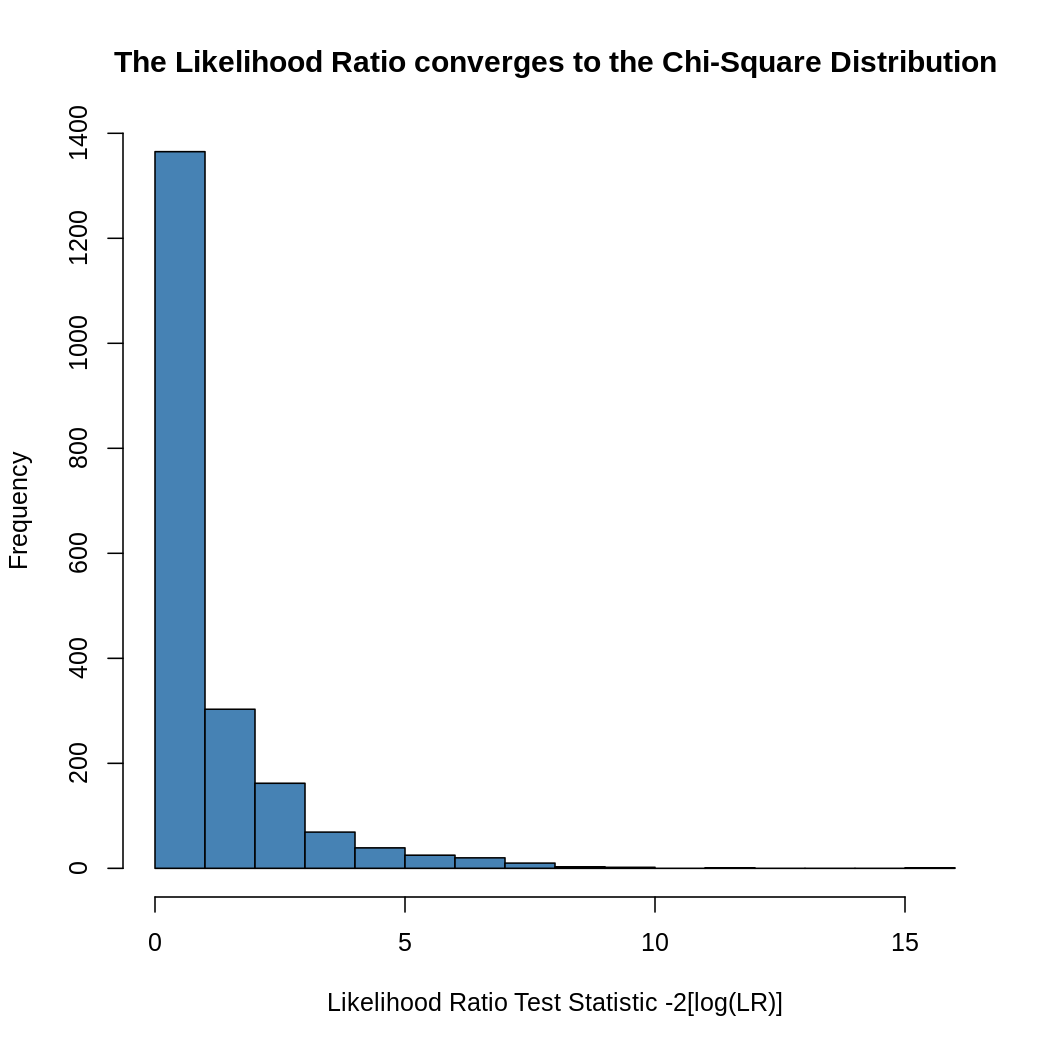

In [45]:
LRTs <- calc_LRTS(flips, 1, 2)
hist((sort(LRTs)), freq=TRUE, breaks=20, col="steelblue", main="The Likelihood Ratio converges to the Chi-Square Distribution", 
     ylab="Frequency", xlab="Likelihood Ratio Test Statistic -2[log(LR)]")

The density plot below show convergence to the chi-square distribution with 1 degree of freedom

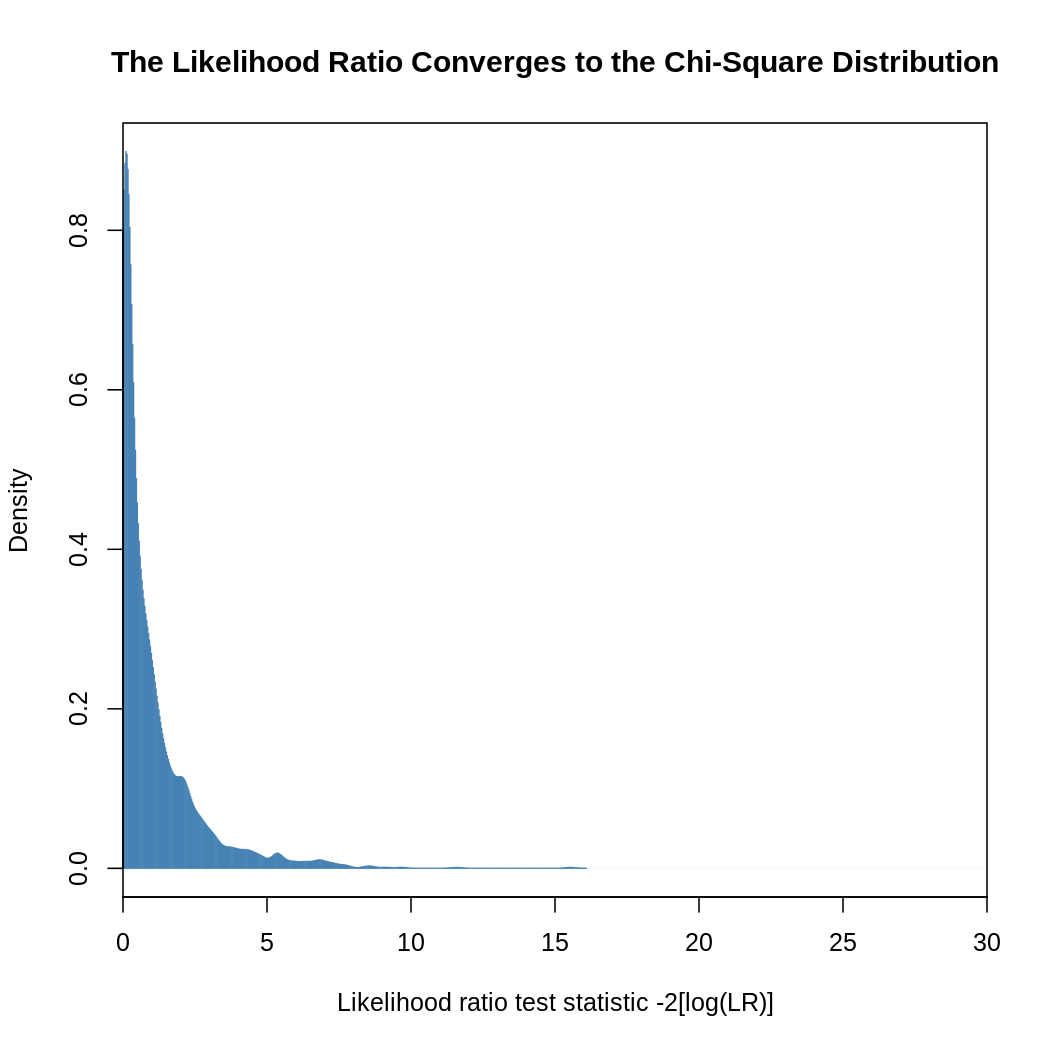

In [46]:
plot(density(sort(LRTs)), col="steelblue", main="The Likelihood Ratio Converges to the Chi-Square Distribution",
     ylab="Density", xlab="Likelihood ratio test statistic -2[log(LR)]", xlim=c(0,30), xaxs="i", type="h")

If we compare a model that uses 10 parameters versus a model that use 1 parameter we can see the distribution of the test statistic change to be chi-square distributed with degrees of freedom equal to 9.

The above graphs show that the value of the test statistic is chi-square distributed. So returning to example of the quarter and the penny, we are now able to quantify exactly much better a fit the two parameter model than the one parameter model. Recall that our likelihood ratio: ML_alternative/ML_null was LR=14.15558. If we take 2[log(14.5558)] we get a Test Statistic value of 5.300218. 

We can use the chi-square CDF to see that given the null hypothesis is true there is a 2.132276 percent chance of observing a Likelihood Ratio statistic at that value. So in this case, at an alpha of .05 we should reject the null hypothesis.

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): object 'LRT' not found


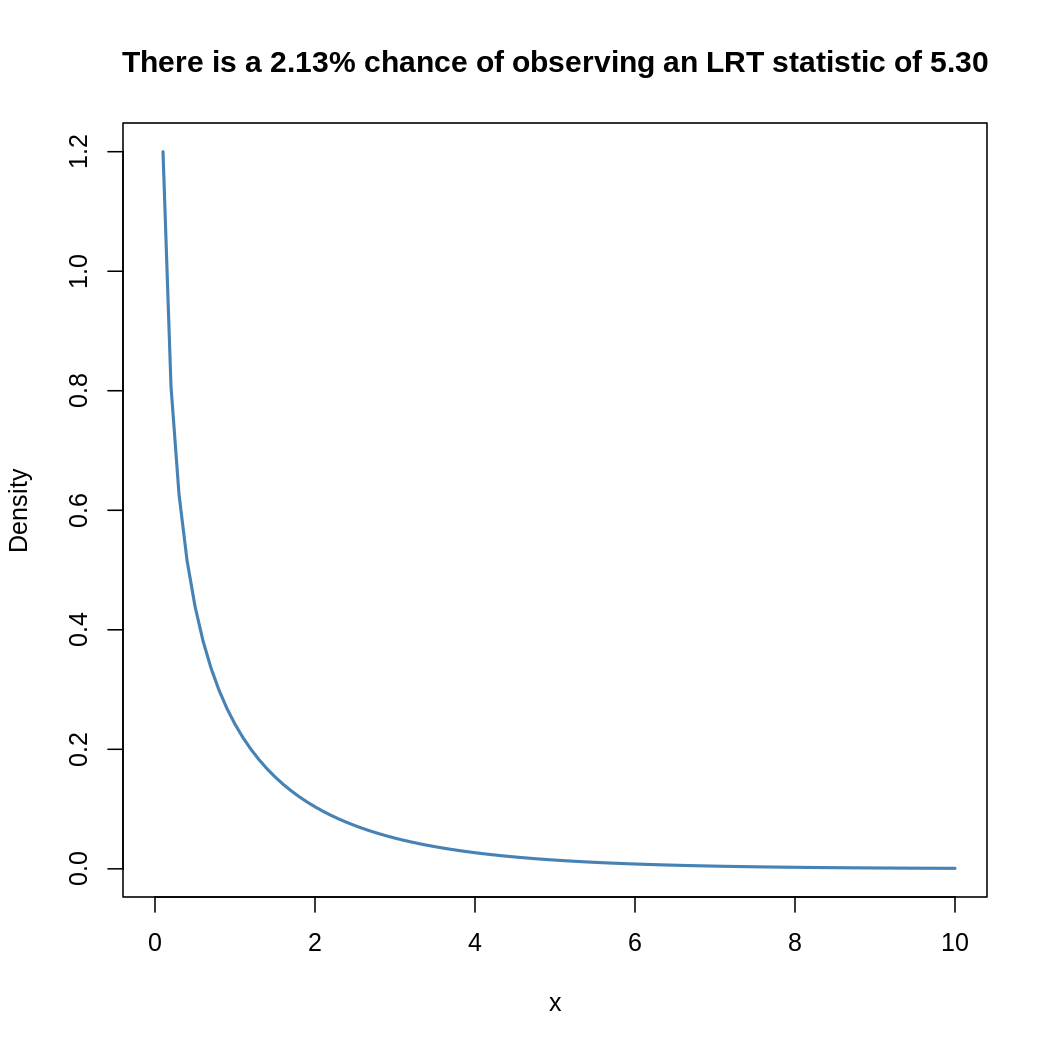

In [51]:
curve(dchisq(x, df=1), from=0, to=10, main="There is a 2.13% chance of observing an LRT statistic of 5.30", 
      ylab="Density", 
      lwd=2, # increase line width to 2
      col= "steelblue")
abline(v=LRT, col="red")

The graph above show that we will only see a Test Statistic of 5.3 about 2.13% of the time given that the null hypothesis is true and each coin has the same probability of landing a heads.

### Conclusion

This article uses the simple example of modeling the flipping of one or multiple coints to demonstrate how the Likelihood-Ratio Test can be used to compare how well two models fit a set of data. We discussed what it means for a model to be "nested" by considering the case of modeling a set of coin flips under the assumption that there is one coin versus two. Finally, we empirically explored Wilk's theorem to show that the LRT statistic is asymptotically chi-square distributed, thereby allowing the LRT to serve as a formal hypothesis test.